In [1]:
from Utilities.ExpModels import ArchModel
import numpy as np
from scipy.integrate import quad, dblquad

In [2]:
model = ArchModel(-1,1, 0,1) 
theta1 = 0.3
theta2 = 0.3
x = model.GeneratorThetaGiven([theta1,theta2],1)[0]

In [3]:
def ret_e(theta1,x):
    Q = np.identity(100)
    R = np.identity(99)*(-theta1)
    Q[1:,:-1] = Q[1:,:-1] + R
    x = x.reshape(100,1)
    e = np.dot(Q,x).reshape(100)
    return e

def val1(a,b,theta2):
    return np.exp(-np.power(b,2)/(2*(0.2+theta2*np.power(a,2))))/np.sqrt(2*np.pi*(0.2+theta2*np.power(a,2)))

def val2(a):
    return np.exp(-np.power(a,2)/2)/np.sqrt(2*np.pi)

def p1_integrand(a,b,theta2):
    return np.exp(val1(a,b,theta2) * val2(a))

def p1(b,theta2):
    return quad(p1_integrand,-np.inf,np.inf,args = (b,theta2))[0]

def Log_prod_term(e,theta2):
    prod = 0
    for i in range(1,100):
        prod = prod + Log_val1(e[i-1],e[i],theta2)
    return prod

def probability(theta1,theta2):
    e = ret_e(theta1,x)
    print(Log_p1(e[0],theta2),' ',Log_prod_term(e,theta2))
    return np.exp(Log_p1(e[0],theta2) + Log_prod_term(e,theta2))

def Lognumerator(theta1,theta2,x):
    return np.log(probability(theta1,theta2))

def Logdenominator(x):
    return np.log(dblquad(probability,-1,1,lambda q: 0,lambda q: 1)[0])

def true_probability(theta1,theta2,x):
    return np.exp(Lognumerator(theta1,theta2,x) - Logdenominator(x))

In [4]:
probability(theta1,theta2)

NameError: name 'Log_p1' is not defined

In [ ]:
Logtrue_probability(theta1,theta2,x)

In [ ]:
np.log(0)

In [ ]:
x.shape

In [ ]:
import pickle
with open('observedData.pickle', 'rb') as f:
     (generatingParameters,obsData) = pickle.load(f)

In [ ]:
x = obsData[0]
n1=10
n2=10
theta1_values=np.linspace(-0.90,0.90 , n1)
theta2_values=np.linspace( 0.1, 0.9 , n2)
xv,yv = np.meshgrid(theta1_values,theta2_values)
theta_vals = np.dstack((xv,yv))
theta_values = theta_vals.reshape(n1*n2,2)

from Utilities.ExpModels import  ArchModel, ARCH_TP
obj = ARCH_TP()
true_posterior = obj.truePosterior(x*10,theta_values)

In [ ]:
obj.visualize(xv,yv,true_posterior)

In [ ]:
with open('estimated_probabilitiesH1.pickle', 'rb') as f:
     estimated_probabilities  = pickle.load(f)

(probabilities,classifiers_test_scores) = estimated_probabilities
probabilities = np.swapaxes(probabilities,0,1)
p1 = probabilities[0]

with open('estimated_probabilitiesH2.pickle', 'rb') as f:
     estimated_probabilities  = pickle.load(f)

(probabilities,classifiers_test_scores) = estimated_probabilities
probabilities = np.swapaxes(probabilities,0,1)
p1 = np.hstack([p1,probabilities[0]])

with open('estimated_probabilitiesH3.pickle', 'rb') as f:
     estimated_probabilities  = pickle.load(f)

(probabilities,classifiers_test_scores) = estimated_probabilities
probabilities = np.swapaxes(probabilities,0,1)
p1 = np.hstack([p1,probabilities[0]])

with open('estimated_probabilitiesH4.pickle', 'rb') as f:
     estimated_probabilities  = pickle.load(f)

(probabilities,classifiers_test_scores) = estimated_probabilities
probabilities = np.swapaxes(probabilities,0,1)
p1 = np.hstack([p1,probabilities[0]])

with open('estimated_probabilitiesH5.pickle', 'rb') as f:
     estimated_probabilities  = pickle.load(f)

(probabilities,classifiers_test_scores) = estimated_probabilities
probabilities = np.swapaxes(probabilities,0,1)
p1 = np.hstack([p1,probabilities[0]])


In [5]:
p1.shape

AttributeError: 'function' object has no attribute 'shape'

In [6]:
x = p1[0] 
n1=10
n2=10
theta1_values=np.linspace(-0.90,0.90 , n1)
theta2_values=np.linspace( 0.1, 0.9 , n2)
xv,yv = np.meshgrid(theta1_values,theta2_values)
theta_vals = np.dstack((xv,yv))
theta_values = theta_vals.reshape(n1*n2,2)

from Utilities.ExpModels import  ArchModel, ARCH_TP
obj = ARCH_TP()

TypeError: 'function' object is not subscriptable

In [7]:
import matplotlib.pyplot as plt

def visualize(theta1,theta2,post1,post2):
    #theta1 is xv from meshgrid
    #theta2 is yv from meshgrid
    fig = plt.figure()
    plt.clf()
    postReshape1 = post1.reshape(theta1.shape)
    postReshape2 = post2.reshape(theta1.shape)
    c1 = plt.contour(theta1, theta2, postReshape1,colors='red')
    c2 = plt.contour(theta1, theta2, postReshape2,colors='green')
    #plt.clabel(CS, inline=1, fontsize=10)
    proxy =[c1,c2]
  #  plt.title('Arch True Posterior')
    c1.collections[0].set_label('Estimated Posterior')
    c2.collections[1].set_label('True Posterior')
    plt.legend()
    plt.xlabel('Theta 1')
    plt.ylabel('Theta 2')
    plt.show()
    fig.savefig('SkipsRBF_Contor.pdf')
        
i=0
visualize(xv,yv,p1[i],tp[i])



NameError: name 'xv' is not defined

In [8]:
obj.visualize(xv,yv,tp[6])

NameError: name 'obj' is not defined

In [9]:
tp =np.load('TruePosterior.npy')

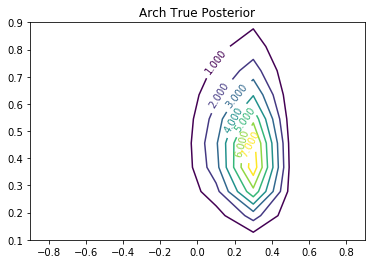

In [10]:
from Utilities.ExpModels import  ArchModel, ARCH_TP
n1=10
n2=10
theta1_values=np.linspace(-0.90,0.90 , n1)
theta2_values=np.linspace( 0.1, 0.9 , n2)
xv,yv = np.meshgrid(theta1_values,theta2_values)
theta_vals = np.dstack((xv,yv))
theta_values = theta_vals.reshape(n1*n2,2)
obj = ARCH_TP()
obj.visualize(xv,yv,tp[0])